In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd

# File path
file_path = "AIML Dataset.csv"

# Read CSV
df = pd.read_csv(file_path)

# Check shape
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# Quick preview
print(df.head())

df.shape

Rows: 6362620
Columns: 11
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


(6362620, 11)

In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [6]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
round((df['isFraud'].value_counts()[1]/df.shape[0])*100,2)

0.13

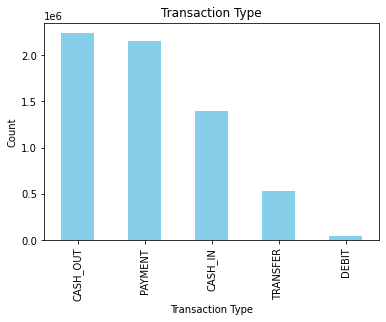

In [9]:
df["type"].value_counts().plot(kind="bar",title='Transaction Type',color='skyblue')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

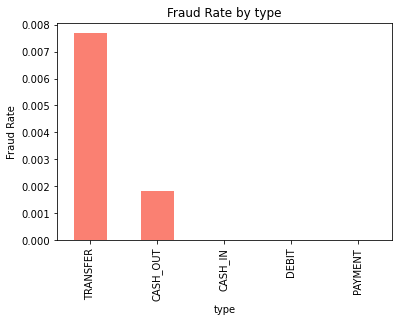

In [10]:
fraud_by_type = df.groupby(['type'])['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud Rate by type" ,color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [11]:
fraud_by_type

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [12]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

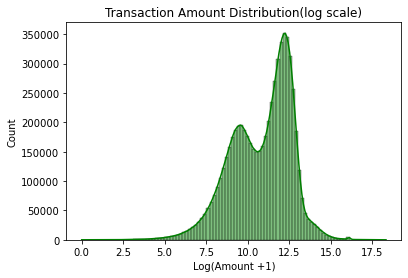

In [13]:
sns.histplot(np.log1p(df["amount"]),bins=100,kde=True,color="green")
plt.title("Transaction Amount Distribution(log scale)")
plt.xlabel("Log(Amount +1)")
plt.show()

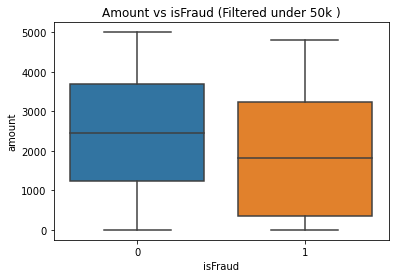

In [14]:
sns.boxplot(data=df[df["amount"]<5000],x='isFraud',y='amount')
plt.title("Amount vs isFraud (Filtered under 50k )")
plt.show()

In [15]:
df['balanceDiffOrig']=df["oldbalanceOrg"] - df["newbalanceOrig"]
df['balanceDiffDest']=df["oldbalanceDest"] - df["newbalanceDest"]

In [16]:
(df["balanceDiffOrig"] <0).sum()

1399253

In [17]:
(df["balanceDiffDest"] <0).sum()

2806464

In [18]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


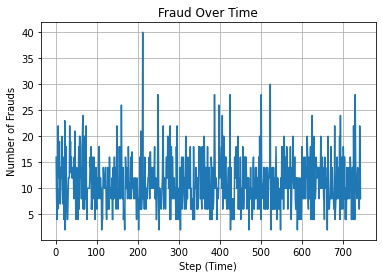

In [19]:
fraud_per_step =df[df['isFraud'] ==1]["step"].value_counts().sort_index()
plt.plot(fraud_per_step.index,fraud_per_step.values,label="fraud per Step")
plt.title("Fraud Over Time")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.grid(True)
plt.show()

In [20]:
df.drop(columns="step",inplace=True)

In [21]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [22]:
top_senders = df["nameOrig"].value_counts().head(10)

In [23]:
top_senders

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: nameOrig, dtype: int64

In [24]:
top_receivers = df["nameDest"].value_counts().head(10)

In [25]:
top_receivers

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

In [26]:
fraud_users =df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [27]:
fraud_users

C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: nameOrig, dtype: int64

In [28]:
fraud_types =df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [29]:
fraud_types.head(10)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,181.00,21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0,15325.00,-46430.44
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0,705.00,22425.00
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0,10835.00,-2712905.89
42,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0,26845.41,286384.84
47,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0,1942.02,6146.82
48,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0,0.00,-5800793.91
51,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0,20411.53,25742.00
58,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0,0,62610.80,-7866.29


In [30]:
fraud_types["type"].value_counts()

CASH_OUT    2237500
TRANSFER     532909
Name: type, dtype: int64

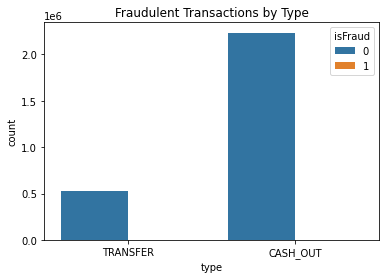

In [31]:
sns.countplot(data=fraud_types, x="type",hue="isFraud")
plt.title("Fraudulent Transactions by Type")
plt.show()

In [32]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]]

In [33]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,9839.64,170136.00,160296.36,0.00,0.00,0
1,1864.28,21249.00,19384.72,0.00,0.00,0
2,181.00,181.00,0.00,0.00,0.00,1
3,181.00,181.00,0.00,21182.00,0.00,1
4,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,850002.52,850002.52,0.00,0.00,0.00,1


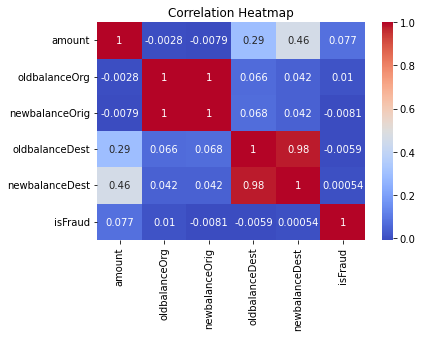

In [34]:
sns.heatmap(corr.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [35]:
zero_after_transfer =df[
    (df['oldbalanceOrg'] >0)&
    (df['newbalanceOrig'] ==0)&
    (df['type'].isin(["TRANSFER","CASH_OUT"]))
]

In [36]:
len(zero_after_transfer)

1188074

In [37]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-2712905.89


In [38]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [40]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [41]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [42]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [43]:
categorical =["type"]
numeric =["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]


In [44]:
y=df_model["isFraud"]
x=df_model.drop("isFraud",axis=1)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [46]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numeric),
        ("cat",OneHotEncoder(),categorical)
    ]
)

In [47]:
pipeline=Pipeline([
    ("prep",preprocessor),
    ("algo",LogisticRegression(class_weight="balanced",max_iter=1000))
])


In [48]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat', OneHotEncoder(),
                                                  ['type'])])),
                ('algo',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [49]:
y_pred=pipeline.predict(x_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [51]:
confusion_matrix(y_test,y_pred)

array([[1805221,  101101],
       [    142,    2322]], dtype=int64)

In [52]:
pipeline.score(x_test,y_test)

0.9469594810523547

In [53]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']